

> Add blockquote
## SIFT Feature Matching using FLANN and Ratio Test

This notebook performs feature detection and matching between two images using the SIFT algorithm and FLANN-based matcher.

### ✅ What it includes:
- Keypoint detection and descriptor extraction using `cv2.SIFT_create()`
- FLANN-based approximate nearest neighbor matching
- Lowe's ratio test to filter ambiguous matches
- Visualization using `cv2.drawMatchesKnn`




📁 Please upload two images (query and target):


Saving querypng to querypng (4)
Saving target.png to target (4).png


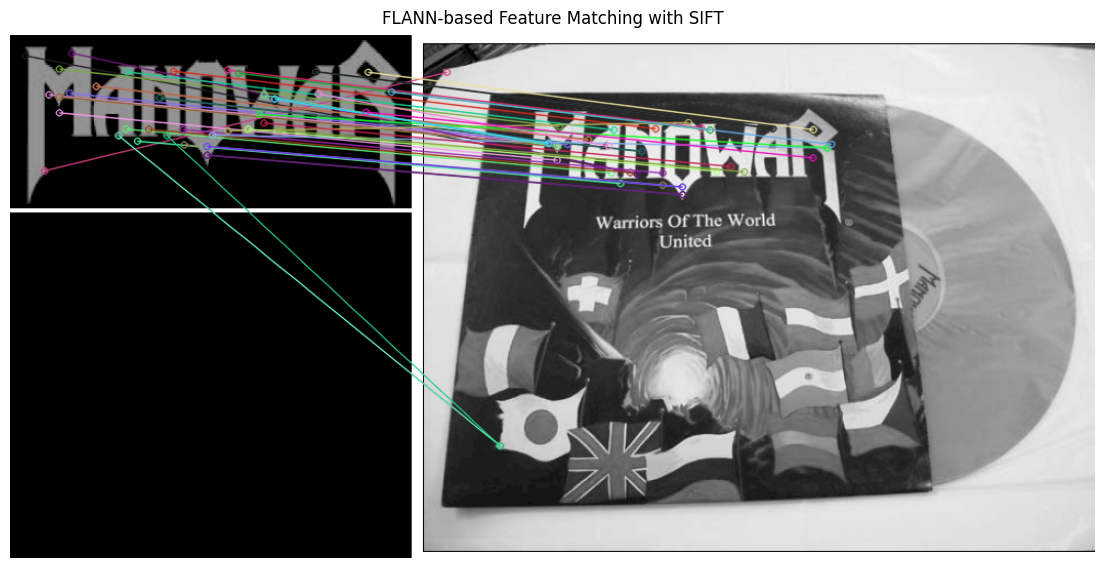

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Step 1: Upload two images
print("📁 Please upload two images (query and target):")
uploaded = files.upload()
file_names = list(uploaded.keys())

if len(file_names) != 2:
    raise Exception("❗ You must upload exactly two images.")

# Step 2: Read images as grayscale
img1 = cv2.imread(file_names[0], cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(file_names[1], cv2.IMREAD_GRAYSCALE)

# Step 3: Create SIFT detector (requires opencv-contrib-python)
sift = cv2.SIFT_create()

# Step 4: Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Step 5: Set FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Step 6: Apply Lowe's Ratio Test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append([m])

# Step 7: Draw good matches
img_matches = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=2)

# Step 8: Show result
plt.figure(figsize=(14, 7))
plt.imshow(img_matches)
plt.axis("off")
plt.title("FLANN-based Feature Matching with SIFT")
plt.show()
